<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/DecisionTrees/DecisionTreeClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Class on Decision Trees

This class was on building decision tress on a real life sales database. 

Since it was a class, I do little data exploration because the rest of the fields and their possible values were already clarified. 

## Loading and data exploration

In [1]:
h <- read.csv('DatosSQLCallCenter.csv',sep=',')

In [2]:
head(h)

,X,idprospecto,venta,yuf,tc,operador,modalidad,localidad,yt,QNoVentas,QInsulta,QNoConectados,QFueraServicio,QContestador
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,662134,0,2012,SPLT,,CPP,AMBA,NA,2,0,1,0,1
2,2,662134,0,2012,SPLT,,CPP,AMBA,NA,2,0,1,0,1
3,3,258087,1,2013,TMAS,,Basica,AMBA,NA,0,0,0,0,0
4,4,210164,0,2012,ITAL,TELECENTRO SOCIEDAD ANONIMA,BASICA,AMBA,2010,2,0,2,1,2
5,5,210166,0,2012,SPLT,TELECENTRO SOCIEDAD ANONIMA,BASICA,AMBA,2010,1,0,0,0,0
6,6,210169,0,2013,VISA,TELECENTRO SOCIEDAD ANONIMA,BASICA,AMBA,2010,0,0,1,1,1


In [3]:
str(h)

'data.frame':	477787 obs. of  14 variables:
 $ X             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ idprospecto   : int  662134 662134 258087 210164 210166 210169 210169 210173 210175 210177 ...
 $ venta         : int  0 0 1 0 0 0 0 0 0 0 ...
 $ yuf           : int  2012 2012 2013 2012 2012 2013 2013 2013 2014 2013 ...
 $ tc            : chr  "SPLT" "SPLT" "TMAS" "ITAL" ...
 $ operador      : chr  " " " " " " "TELECENTRO SOCIEDAD ANONIMA" ...
 $ modalidad     : chr  "CPP" "CPP" "Basica" "BASICA" ...
 $ localidad     : chr  "AMBA" "AMBA" "AMBA" "AMBA" ...
 $ yt            : int  NA NA NA 2010 2010 2010 2010 NA 2010 2010 ...
 $ QNoVentas     : int  2 2 0 2 1 0 0 1 1 2 ...
 $ QInsulta      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ QNoConectados : int  1 1 0 2 0 1 1 0 0 0 ...
 $ QFueraServicio: int  0 0 0 1 0 1 1 0 0 0 ...
 $ QContestador  : int  1 1 0 2 0 1 1 0 0 0 ...


First, I identified that idprospecto is not like a regular id, it has some repetitions, probably having to do with calling a same prospective client a few times in different years. 

In [4]:
table(h$idprospecto)


     53     115     134     161     216     235     298     450     483     548 
      1       1       2       1       1       2       1       1       1       1 
    575     706     750     753     765     795     804     857     890     900 
      2       1       1       1       1       1       1       2       1       1 
    935     973    1005    1006    1027    1136    1285    1296    1297    1298 
      1       2       1       2       2       5       1       1       2       1 
   1353    1399    1420    1475    1495    1519    1629    1632    1671    1712 
      1       1       4       1       1       2       1       2       1       1 
   1774    1815    1819    1832    1837    1867    1870    1893    1906    1921 
      1       2       1       1       2       3       1       1       1       2 
   1936    1949    1999    2019    2023    2044    2047    2071    2120    2134 
      3       2       2       1       2       1       1       1       1       1 
   2217    2223    2224    

Second, I want to see how many sales and how many not sales I actually have, since I can sense that this is going to be a heavily unbalanced dataset. It indeed is, there being more than two orders of magnitude of difference. 

In [5]:
table(h$venta)


     0      1 
473476   4311 

## Balancing the tree

We are facing a heavily unbalanced dataset. Therefore, we will dedicate some time to balancing it, taking a random sample of a very small fraction the non sales registers. Then we bind both datasets as the new total dataset. 

In [6]:
hsi <- h[which(h$venta == 1),] # there are sales
hno <- h[which(h$venta == 0),] # there are no sales
hnof <- hno[which(runif(nrow(hno))<0.05),] #random sample of approximately half the elements

In [7]:
nrow(hnof)

[1] 23633

In [8]:
hr <- rbind(hsi,hnof) # this is the dataset we will use for the tree

Then, we divide into train and test datasets randomly using similar tools than the ones I used for selecting randomly non sales. 

In [9]:
x <- runif(nrow(hr))
htrain <- hr[which(x<0.7),]
htest <- hr[which(x>=0.7),]

In [10]:
nrow(htrain)

[1] 19619

In [11]:
nrow(htest)

[1] 8325

## The decision tree itself: importing libraries and constructing the tree

For that, we will import library rpart, and then initialize the function $f$ which will tell us which variables our decision on ventas will depend on. Finally, we create the tree itself $t$ and train it. 

In [12]:
library(rpart)

In [13]:
f <- 'venta ~	yuf	+ tc+ operador	+ modalidad +	localidad +	yt +	QNoVentas +	QInsulta +	QNoConectados +	QFueraServicio +	QContestador'

In [14]:
t <- rpart(formula=f,method='class',data=htrain)

Let's analyse our tree then. The plot function gives us an idea of how many nodes and leafs we have. However, it doesn't tell us how the division actually is. Same for the text function, it isn't very clarifying either. 

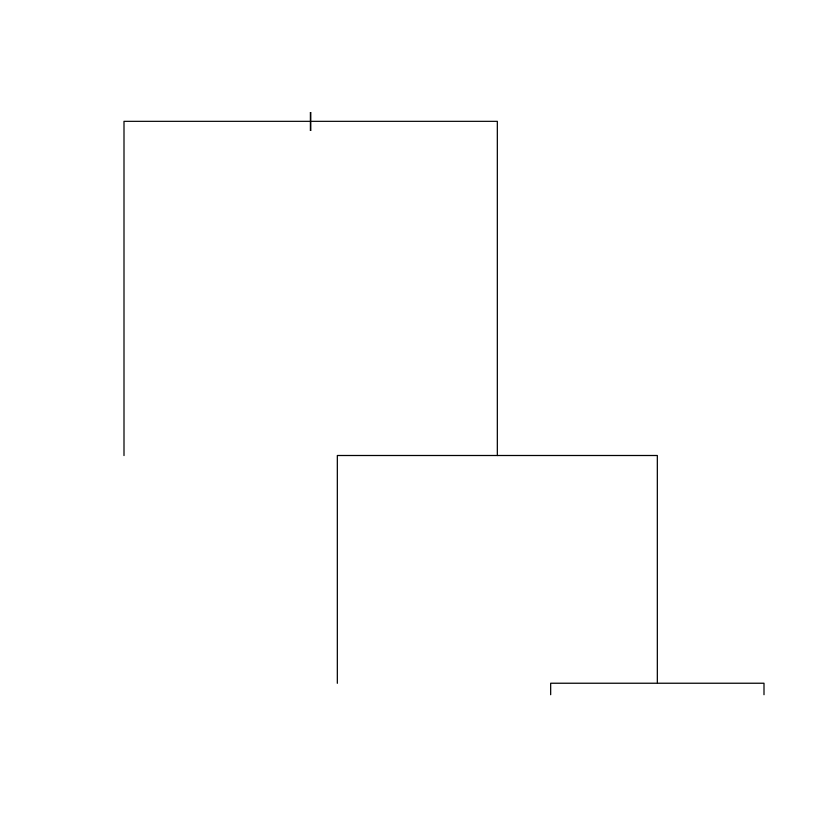

In [15]:
plot(t)

Warning message in labels.rpart(x, minlength = minlength):
“more than 52 levels in a predicting factor, truncated for printout”


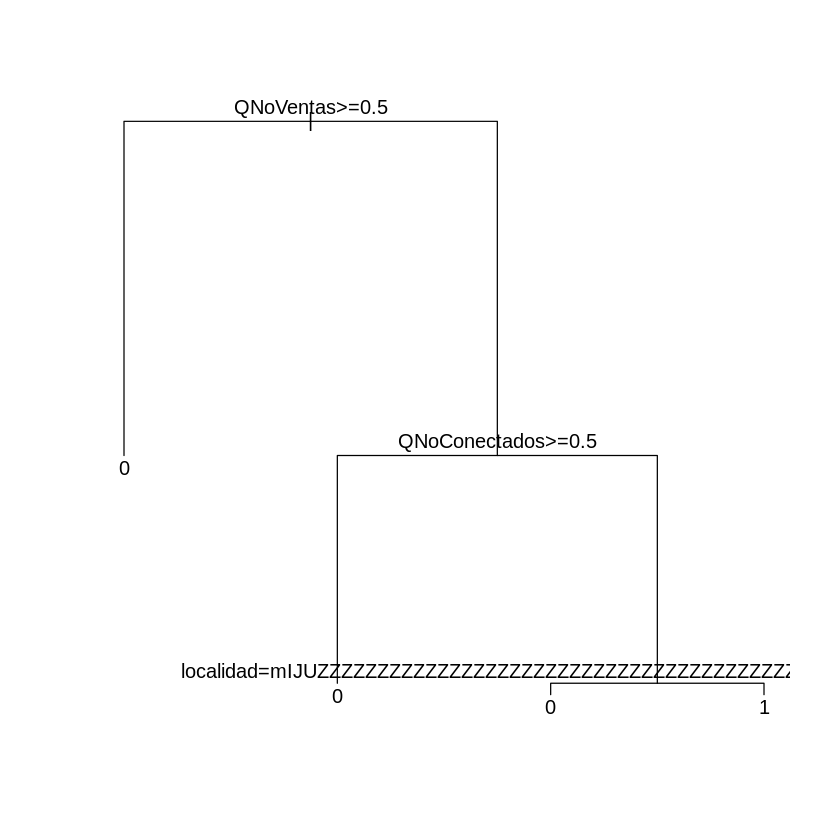

In [16]:
plot(t)
text(t)

We can also calculate variable importance, which tell us which variables are the ones with the most predictive power. 

In [17]:
t$variable.importance

QNoVentas  QNoConectados   QContestador QFueraServicio      localidad 
  2821.3894946    835.7116573    728.3574210    407.2893594    205.9586597 
      operador       QInsulta 
    54.2741184      0.3257583

Now let's try to do a prediction on our train dataset. Here we see that we have a problem with new labels that weren't included in our initial training set and ended up on the test one. For example, with attribute $tc$. 

In [18]:
pred <- predict(t,newdata=htest)

ERROR: ignored

ERROR: ignored

In [19]:
table(htrain$tc)


     AMEX ARGE CABA CASU CAUT CMRF CRED DINE GALI GENW HSBC ITAC ITAL KADI LIST 
 475  100  486  142    4    3    8    7   15    2    5    1    2   34   11   18 
MAST MIRA MPAG MPGO NATI NEVA NRNJ NULL PEND PLAT PROA PRVD SPLT STAR SUCR TMAC 
   8    1    4   33   63   97  309  351    2    1   16    2 1142    1    3   21 
TMAS TSHN TSHO UPSE VISA VISU WBAM WBAR WBNR WBSH WBVS XFEC 
  62    2  127    2 2566    5    2    6    2    1    3   12 

In [20]:
table(htest$tc)


     AMEX ARGE CABA CASU CAUT CMRF CRED DINE GALI GENW HSBC ITAL KADI LIST MAST 
 214   56  208   52    1    2    4    2   18    2    1    1   12   10    5    3 
MPAG MPGO NATI NEVA NRNJ NULL PEND PLAT PROA SPLT SUCR TMAC TMAS TSHN TSHO VISA 
   2   16   29   32  124  153    3    1    6  483    1   13   37    2   49 1114 
VISU WBAM WBNR WBSH WBVS XFEC 
   3    2    1    1    3    1 

To solve that, we will filter all cards that appear less than ten times and put them in a new category of generic other less frequent cards 'Otros'. We do that in the following lines of code. We again partition into train and test sets. 

In [21]:
fc <- as.factor(hr$tc)
tb <- as.vector(table(hr$tc))
pocos <- which(tb<10)
levels(fc)[pocos] <- 'Otros'
hr$tc <- as.vector(fc) 

In [22]:
x <- runif(nrow(hr))
htrain <- hr[which(x<0.7),]
htest <- hr[which(x>=0.7),]

In [23]:
t <- rpart(formula=f,method='class',data=htrain)

Warning message in labels.rpart(x, minlength = minlength):
“more than 52 levels in a predicting factor, truncated for printout”


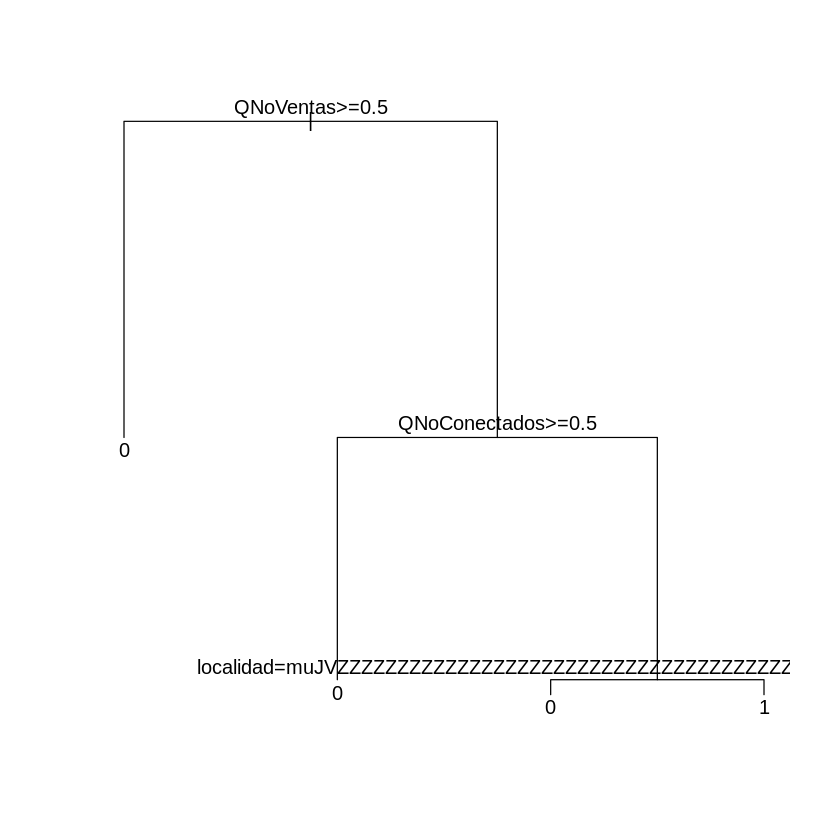

In [24]:
plot(t)
text(t)

In [25]:
pred <- predict(t,newdata=htest)

ERROR: ignored

ERROR: ignored

There are still problems with categories of operador attribute. Again, we know how to solve this like we did before. 

In [26]:
fc <- as.factor(hr$operador)
tb <- as.vector(table(hr$operador))
pocos <- which(tb<10)
levels(fc)[pocos] <- 'Otros'
hr$operador <- as.vector(fc) 

In [27]:
x <- runif(nrow(hr))
htrain <- hr[which(x<0.7),]
htest <- hr[which(x>=0.7),]

In [28]:
t <- rpart(formula=f,method='class',data=htrain)

Warning message in labels.rpart(x, minlength = minlength):
“more than 52 levels in a predicting factor, truncated for printout”


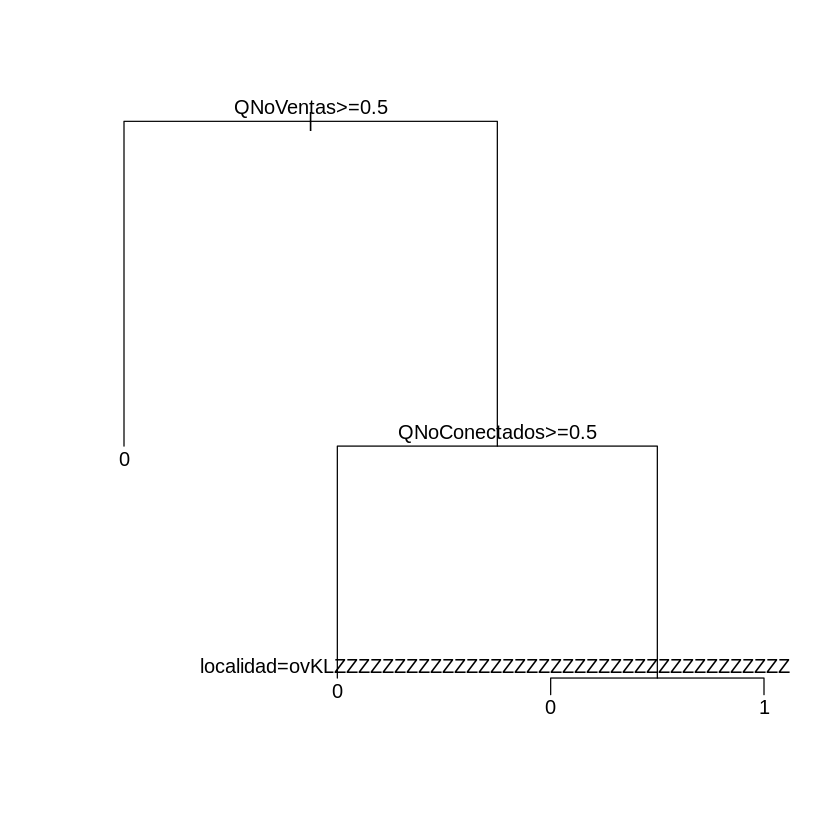

In [29]:
plot(t)
text(t)

In [30]:
pred <- predict(t,newdata=htest)

ERROR: ignored

ERROR: ignored

Now the same thing happens with localidad. We solve that again with a modified script (I feel like maybe we could do this more easily by checking from the beginning, but idk). Now everything seems to be okay. We calculate the importance and we visualize the tree. We see that both things have changed significatively since the first tree we built. 

In [31]:
fc <- as.factor(hr$localidad)
tb <- as.vector(table(hr$localidad))
pocos <- which(tb<10)
levels(fc)[pocos] <- 'Otros'
hr$localidad <- as.vector(fc) 

In [32]:
x <- runif(nrow(hr))
htrain <- hr[which(x<0.7),]
htest <- hr[which(x>=0.7),]

In [33]:
t <- rpart(formula=f,method='class',data=htrain)

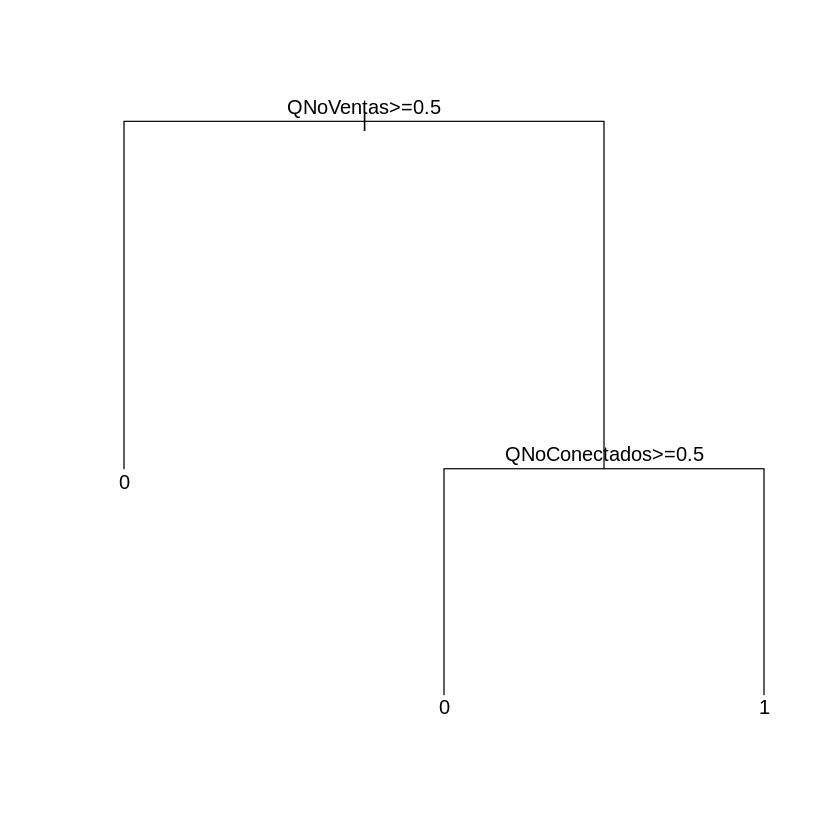

In [34]:
plot(t)
text(t)

In [35]:
t$variable.importance

QNoVentas  QNoConectados   QContestador QFueraServicio      localidad 
   2832.694581     821.404661     699.998961     416.946927      32.068392 
      operador 
      9.061723

In [36]:
pred <- predict(t,newdata=htest)

Finally, we will analyse the modalidad attribute and seeing which values it can take and how frequent they are. We observe that there are essentially two values, and several equivalents for each of them: with and without blank spaces, all in caps or not. So, afterwards, we perform a bit of data cleaning for that. 

In [37]:
table(hr$modalidad)


                                                 Basica 
                                                     59 
                                                 BASICA 
                                                  22829 
Basica                                                  
                                                    132 
                                                    CPP 
                                                   3969 
   CPP                                                  
                                                    955 

In [38]:
m <- hr$modalidad
m <- toupper(m) # all to uppercase
m <- trimws(m) #eliminate blank spaces
hr$modalidad <- m

Again, we do the split and training one last time, we predict and we start looking at our final tree. 

In [39]:
x <- runif(nrow(hr))
htrain <- hr[which(x<0.7),]
htest <- hr[which(x>=0.7),]

In [40]:
t <- rpart(formula=f,data=htrain)

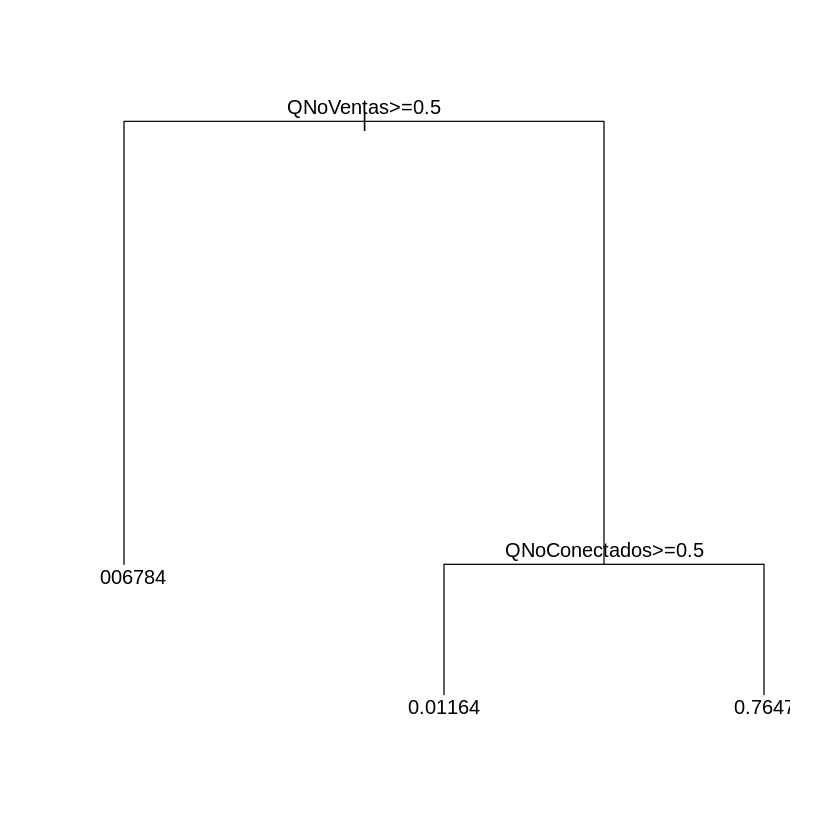

In [41]:
plot(t)
text(t)

In [42]:
t$variable.importance

QNoVentas  QNoConectados   QContestador QFueraServicio      localidad 
   1348.076903     396.699865     335.399486     192.577234      13.460849 
      operador 
      3.497713

In [43]:
pred <- predict(t,newdata=htest)

## What did the tree gives us as a result?

Now we will analyse the tree results using a few R functions. For example, we can use $table(pred)$ or $hist(pred)$ which tells us what the outputs were assigned to after going through the tree. We see that we have several outputs instead of just 0 and 1 (sales or not sales) corresponding to the several leafs of our tree. 

In [44]:
table(pred)

pred
0.00678398710370768  0.0116414435389988   0.764737121614445 
               6387                 381                1663 

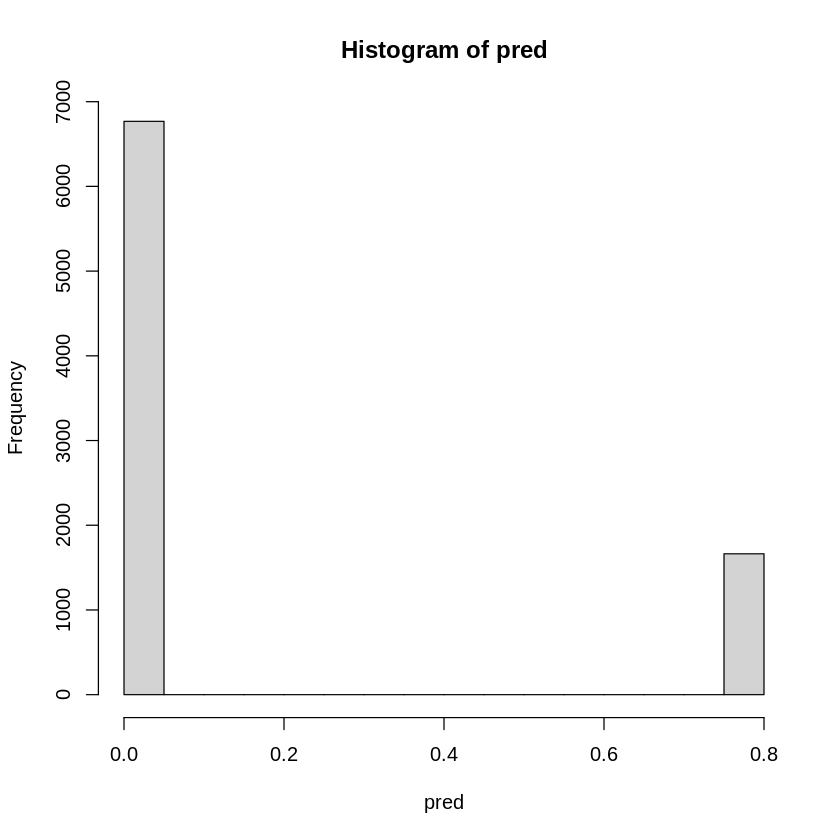

In [45]:
hist(pred)

Now, we have to take a decision: do we call the person because we're gonna sell or we don't? For that, we need a threshold to filter these results. We are going to consider that $>0.5$ is a sell and $<0.5$ is not. Then, we will analyse the correct (predict sale and sells, predict not sell and not sell) and the incorrect (predict sale and not sell, predict not sell and sell) possibilities. 

In [46]:
qtp <- length(which(pred > 0.5 & htest$venta == 1)) #true positives
qtn <- length(which(pred <= 0.5 & htest$venta == 0)) #true negatives
qfp <- length(which(pred > 0.5 & htest$venta == 0)) #false positives
qfn <- length(which(pred <= 0.5 & htest$venta == 1)) #false negatives

In [47]:
print(paste(qtp,qtn,qfp,qfn))

[1] "1283 6731 380 37"


But how relevant is this for a business? Which ones are more unforgivable flaws? To do that, we are going to assign an economic value to each of them. We assign values to each of them (this looks like a game theory thing, nice). 

In [48]:
vtp <- 900
vtn <- 0
vfp <- -100
vfn <- 0

Now we calculate the expected revenue (taking into account that we trained with 1/20 of the not sales data). 

In [49]:
v <- qtp * vtp + vtn * qtn * 20 + vfp * qfp *20 + vfn * qfn 

In [50]:
v

[1] 394700

Nice! That's quite the amount of money (considering our investment in calling someone). What are other alternative strategies to using the tree?

Well, the first one could be calling everyone, which is expected to be suboptimal. Let's calculate the expected revenue. Its is negative, meaning that we would be loosing money if we called everyone!

In [51]:
v_everyone <- vtp * length(which(htest$venta==1)) + vfp * 20 * length(which(htest$venta==0))

In [52]:
v_everyone

[1] -13034000

On the other hand, let us compare with the optimal strategy, which will give us a sense for how much we can improve the tree and get a higher revenue. The optimal strategy consists in only calling those who will buy us. 

Wow! Huge revenue of a million!Specially to the 250k we would make using the tree. 

In [53]:
v_optimal <- vtp * length(which(htest$venta == 1))

In [54]:
v_optimal

[1] 1188000

## How can we optimize our results?
We saw that we can greatly increase profit margin. Therefore, we need to optimize the tree to make better predictions, albeit using the tree is already better than not using it. We have two main tools:
- the complexity parameter $cp$ which will make for a more deep or less deep tree.
- the threshold that we used before.

First, we will modify the $cp$ mantaining the threshold value to see if our predictions are any better. I have tried with various results, and based on expected revenue I have kept the value $cp = 0.001$. 

In [55]:
t <- rpart(formula=f,data=htrain, cp=.001)

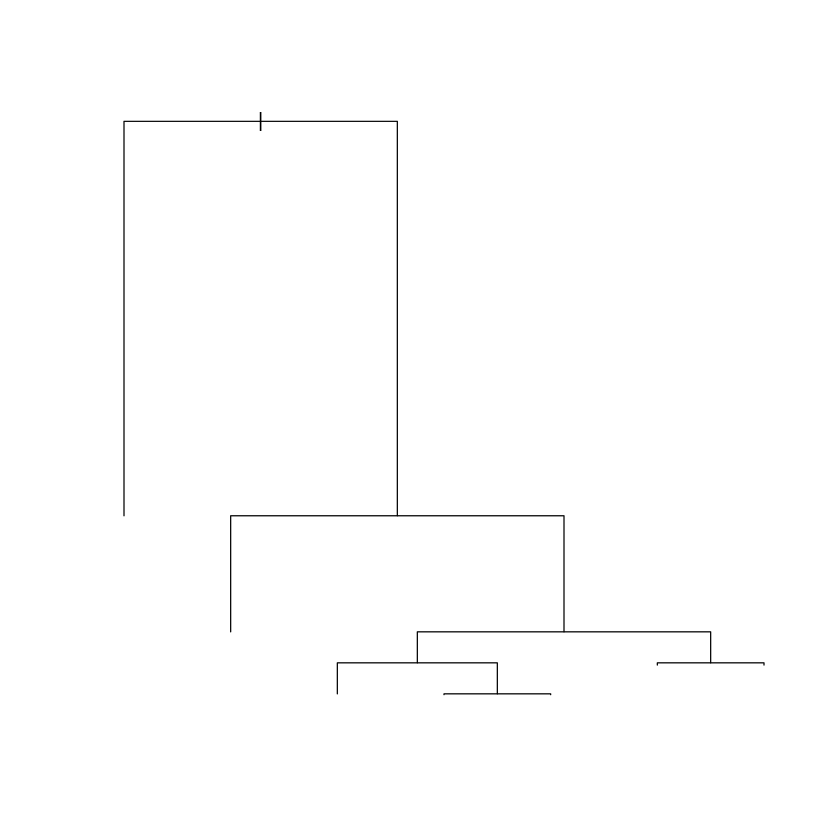

In [56]:
plot(t)
#text(t)

In [57]:
pred <- predict(t,newdata=htest)

In [58]:
table(pred)

pred
0.00678398710370768  0.0116414435389988   0.166666666666667   0.256410256410256 
               6387                 381                   4                  16 
  0.653846153846154   0.770508826583593   0.919270833333333 
                215                1274                 154 

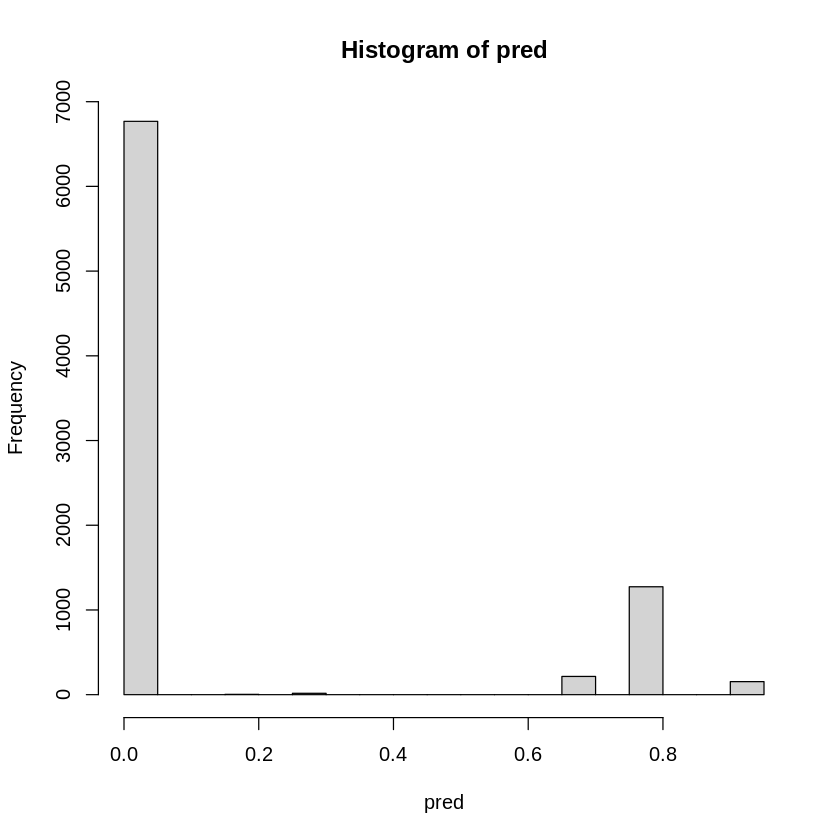

In [59]:
hist(pred)

In [60]:
qtp <- length(which(pred > 0.5 & htest$venta == 1)) #true positives
qtn <- length(which(pred <= 0.5 & htest$venta == 0)) #true negatives
qfp <- length(which(pred > 0.5 & htest$venta == 0)) #false positives
qfn <- length(which(pred <= 0.5 & htest$venta == 1)) #false negatives

In [61]:
print(paste(qtp,qtn,qfp,qfn))

[1] "1268 6736 375 52"


In [62]:
v <- qtp * vtp + vtn * qtn * 20 + vfp * qfp *20 + vfn * qfn 
v

[1] 391200

Now we can use the threshold as an optimization tool. That is, we will move the threshold and find an optimal one to maximize our gain. 

In [63]:
thresholds <- seq(0,1,0.01)
v_thresholds <- seq(0,1,0.01)
v_thresholds[] <- 0 

In [64]:
j = 1
for(i in thresholds){
  qtp <- length(which(pred > i & htest$venta == 1)) #true positives
  qtn <- length(which(pred <= i & htest$venta == 0)) #true negatives
  qfp <- length(which(pred > i & htest$venta == 0)) #false positives
  qfn <- length(which(pred <= i & htest$venta == 1)) #false negatives
  v <- qtp * vtp + vtn * qtn * 20 + vfp * qfp *20 + vfn * qfn 
  v_thresholds[j] <- v
  j <- j +1
}

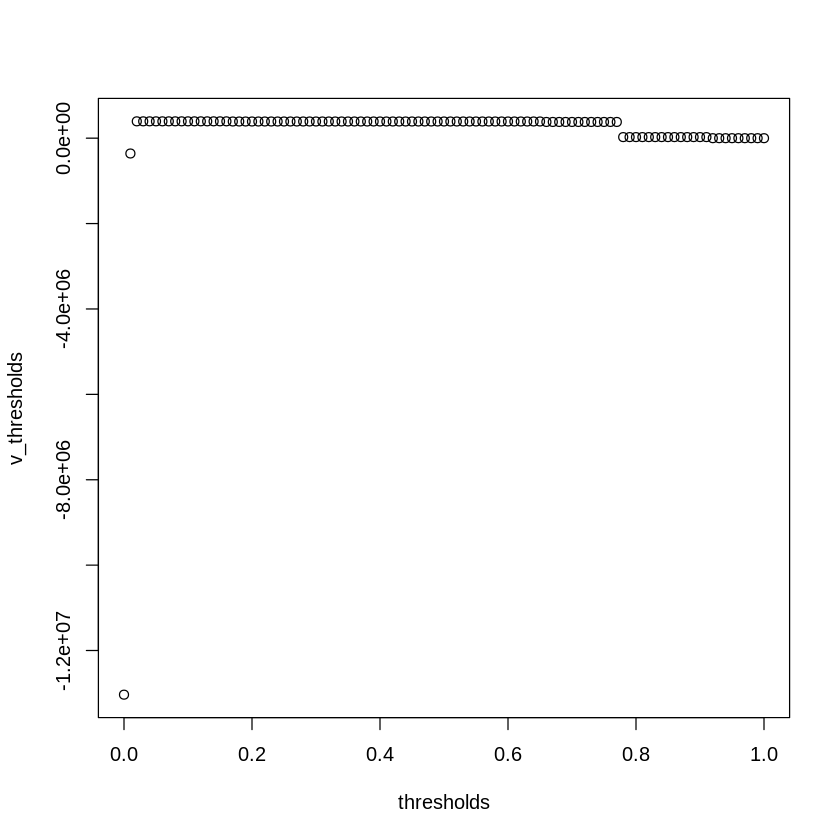

In [65]:
plot(thresholds,v_thresholds)

In [66]:
max_pos <- which.max(v_thresholds)

In [67]:
max_thr <- thresholds[max_pos]

In [68]:
max_thr

[1] 0.02

In [69]:
v_thresholds[max_pos]

[1] 394700

Therefore, we have obtained a lot more gain than we had before, just by adjusting the $cp$ and the threshold. 

## Rentability and Investment 

Oftenly, what is important in the business field is calculating or optimizing rentability to obtain better results by investing less money. That's another thing we can calculate with a similar procedure as before. In this case, our investment is the money dedicated to making the calls, whereas the rentability is dividing gain by this investment. The code is analogous to the one we used before. 

In [72]:
thresholds <- seq(0,1,0.01)
v_thresholds <- seq(0,1,0.01)
investment <- seq(0,1,0.01)
rentability <- seq(0,1,0.01)
v_thresholds[] <- 0 
investment[] <- 0 
rentability[] <- 0 

In [73]:
j = 1
for(i in thresholds){
  qtp <- length(which(pred > i & htest$venta == 1)) #true positives
  qtn <- length(which(pred <= i & htest$venta == 0)) #true negatives
  qfp <- length(which(pred > i & htest$venta == 0)) #false positives
  qfn <- length(which(pred <= i & htest$venta == 1)) #false negatives
  v <- qtp * vtp + vtn * qtn * 20 + vfp * qfp *20 + vfn * qfn 
  c <- -vfp*(qtp + 20*qfp)  #cost of calls made
  r <- v/c #rentability
  v_thresholds[j] <- v
  investment[j] <- c
  rentability[j] <- r 
  j <- j +1
}

In [74]:
investment <- investment[investment>0]
rentability <- rentability[which(investment>0)]

In [75]:
print(which.max(investment))
print(max(investment))

[1] 1
[1] 14354000


In [76]:
print(which.max(rentability))
print(max(rentability))

[1] 67
[1] 0.5171289


## Plotting a much nicer decision tree

In [77]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [78]:
#prp(t) #this makes everything crush